In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from zipfile import BadZipFile

# Function to convert Excel files to signals
def excel_to_signals(folder_path):
    signals = []  # List to store signals for each person
    
    # Iterate through each file in the folder
    for file_name in tqdm(os.listdir(folder_path),desc="processing"):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(folder_path, file_name)

            try:
                
                # Read Excel file into DataFrame
                df = pd.read_excel(file_path, engine='openpyxl')
                
                # Assuming columns for heartbeat and hemoglobin are named accordingly
                heartbeat = df[df.columns[2]].values
                hemoglobin = df[df.columns[4]].values
                
                # Convert to signals (example: simple concatenation)
                signal = np.concatenate((heartbeat, hemoglobin))
                
                # Append the signal for this person to the list
                signals.append(signal)
            except BadZipFile:
                print(f"Skipping {file_name} because it's not a valid Excel file.")
                continue
    
    return signals

# Example usage
folder_path = 'Dataset'
signals = excel_to_signals(folder_path)


processing: 100%|██████████████████████████████████████████████████████████████████████| 23/23 [00:36<00:00,  1.58s/it]

Skipping ~$pone.0211710.s001.xlsx because it's not a valid Excel file.


In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

In [3]:
filename = 'Dataset/pone.0211710.s005.xlsx'
df = pd.read_excel(filename)
bloodpressure = df[df.columns[3]].values
hemoglobin = df[df.columns[8]].values
# print(f"Columns in {filename}: {df.columns}")

In [4]:
bloodpressure.shape

(23437,)

In [5]:
hemoglobin.shape

(23437,)

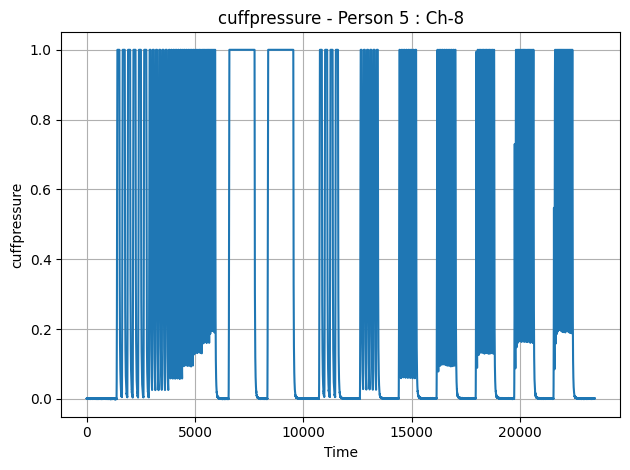

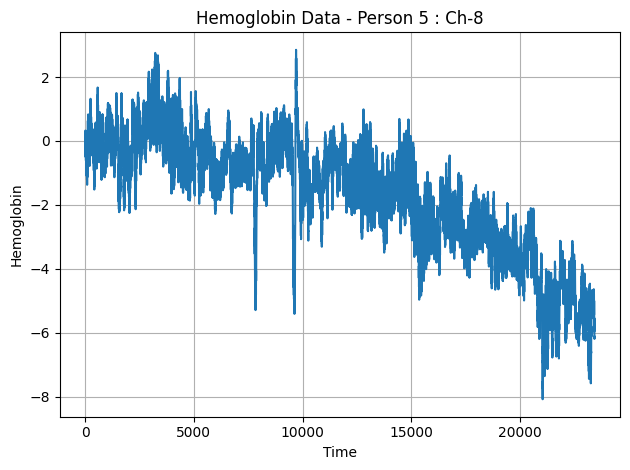

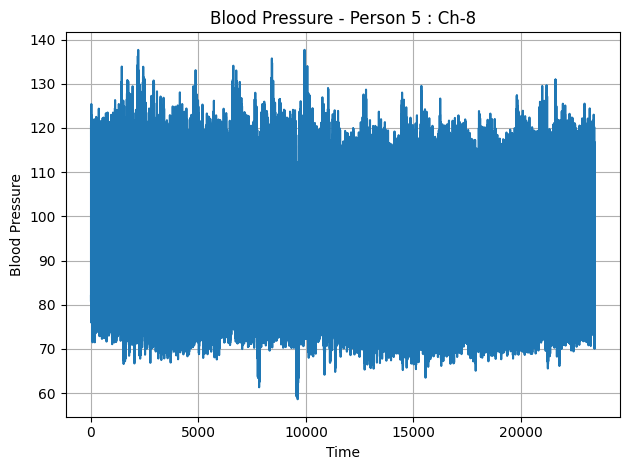

In [19]:
# Extract time stamps from column 0
time_stamps = df[df.columns[0]].values
heartrate = df[df.columns[2]].values
cuffpressure= df[df.columns[1]].values

plt.plot(time_points, cuffpressure)
plt.xlabel('Time')
plt.ylabel('cuffpressure')
plt.title(f'cuffpressure - Person 5 : Ch-8')
plt.grid(True)

plt.tight_layout()
plt.show()

plt.plot(time_points, hemoglobin)
plt.xlabel('Time')
plt.ylabel('Hemoglobin')
plt.title(f'Hemoglobin Data - Person 5 : Ch-8')
plt.grid(True)

plt.tight_layout()
plt.show()

plt.plot(time_points, bloodpressure)
plt.xlabel('Time')
plt.ylabel('Blood Pressure')
plt.title(f'Blood Pressure - Person 5 : Ch-8')
plt.grid(True)

plt.tight_layout()
plt.show()

In [14]:
import scipy.signal
f1, Phb = scipy.signal.csd(hemoglobin, bloodpressure)
f2, Phh = scipy.signal.csd(hemoglobin, hemoglobin)
f3, Pbb = hb = scipy.signal.csd(bloodpressure, bloodpressure)

In [8]:
MSC = Phb/(Phh*Pbb)

C:\Users\91820\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\91820\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


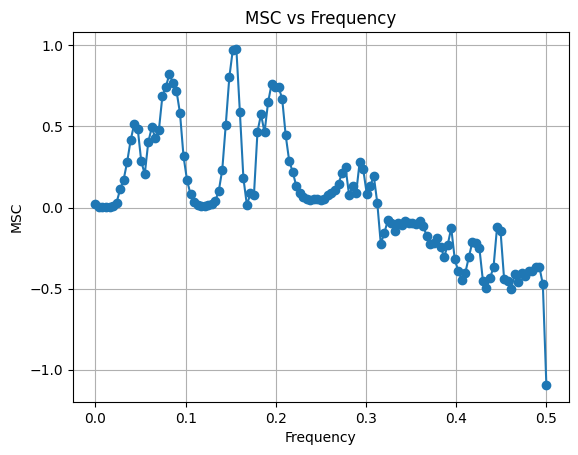

In [9]:
plt.plot(f1, MSC, marker='o')
plt.title('MSC vs Frequency')
plt.xlabel('Frequency')
plt.ylabel('MSC')
plt.grid(True)
plt.show()